In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load merged data
merged_data = pd.read_csv('../data/Merged_Data.csv')

In [3]:
# Feature Engineering for Clustering
customer_clustering_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'ProductID': 'nunique',
    'TransactionDate': lambda x: (pd.to_datetime(merged_data['TransactionDate'].max()) - pd.to_datetime(x).max()).days
}).reset_index()
customer_clustering_data.rename(columns={
    'TransactionID': 'Frequency',
    'TransactionDate': 'Recency'
}, inplace=True)

In [4]:
# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_clustering_data[['TotalValue', 'Frequency', 'Recency']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_clustering_data['Cluster'] = kmeans.fit_predict(normalized_features)

Davies-Bouldin Index: 0.9588414415600702


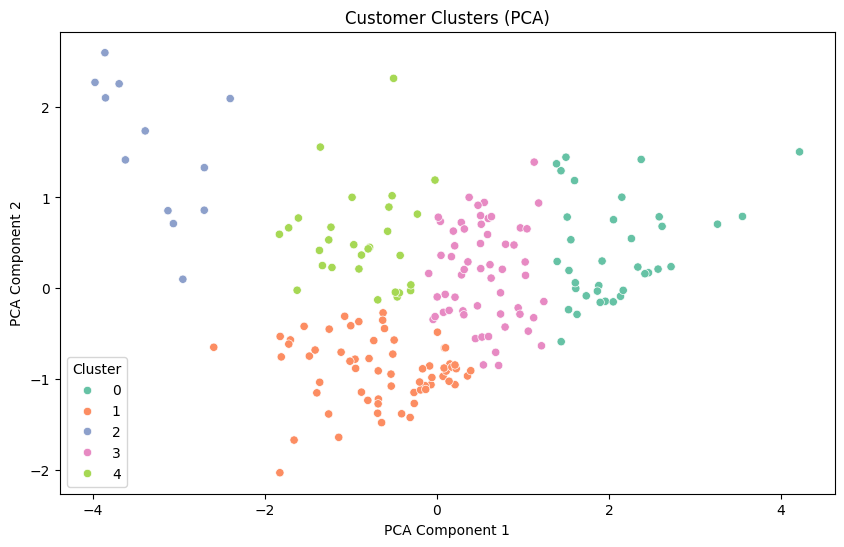

In [5]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_features, customer_clustering_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=customer_clustering_data['Cluster'], palette='Set2')
plt.title('Customer Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig('../clustering/visualizations/customer_clusters_pca.png')
plt.show()

# Save clustering results
customer_clustering_data.to_csv('Samson_Sabu_Clustering.csv', index=False)
